# correlation

In [126]:
import pandas as pd
books = pd.read_csv('books/friends_books_topics_model.csv', index_col=0)
sb = pd.read_csv('scriptbase/friends_scriptbase_topics.csv', index_col=0)
friends_no_topics = pd.read_csv('transcripts and metadata/friends_mastersheet.csv', index_col=0)

In [127]:
books.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,t290,t291,t292,t293,t294,t295,t296,t297,t298,t299
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.000000,0.000000,0.003622,0.0,0.000000,0.000008,0.000726,0.0,0.008491,0.000010
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.000869,0.000286,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.003331,0.000057
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.003109,0.000000,0.000000,0.0,0.000000,0.000221,0.005802,0.0,0.000000,0.000000
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.000000,0.000058,0.000000,0.0,0.000000,0.000351,0.000000,0.0,0.021268,0.000386
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.000000,0.000694,0.000000,0.0,0.000055,0.000000,0.002872,0.0,0.007433,0.000830


## votes and stars to each other

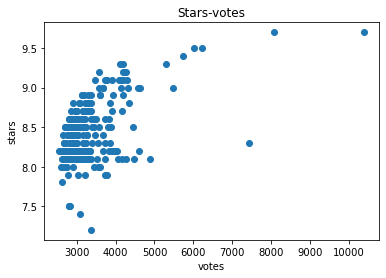

In [128]:
import matplotlib.pyplot as plot

import numpy as np

 

# Hypothetical equity returns

stars = books['Stars']
votes = books['Votes']

 

# Draw the scatter plot

plot.scatter(votes, stars)
plot.title('Stars-votes')
plot.xlabel('votes')
plot.ylabel('stars')

plot.show()

## Votes and stars with season/episode

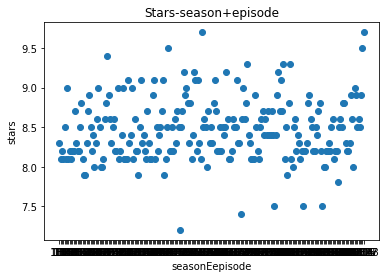

In [129]:
import matplotlib.pyplot as plot

import numpy as np


books['seasonep'] = [f'{season}E{episode}' for season, episode in zip(books['Season'], books['Episode Number'])]

# Hypothetical equity returns

stars = books['Stars']
seasonep = books['seasonep']

 

# Draw the scatter plot

plot.scatter(seasonep, stars)
plot.title('Stars-season+episode')
plot.xlabel('seasonEepisode')
plot.ylabel('stars')

plot.show()

In [143]:
from scipy.stats import spearmanr

spearmanr(seasonep, stars)

SpearmanrResult(correlation=-0.035248315095050935, pvalue=0.5900336560848645)

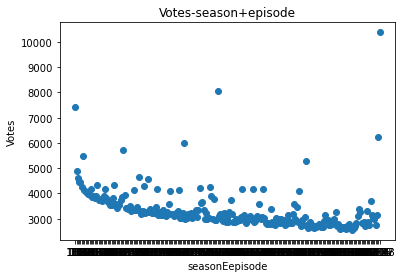

In [130]:
import matplotlib.pyplot as plot

import numpy as np


books['seasonep'] = [f'{season}E{episode}' for season, episode in zip(books['Season'], books['Episode Number'])]

# Hypothetical equity returns

Votes = books['Votes']
seasonep = books['seasonep']

 

# Draw the scatter plot

plot.scatter(seasonep, Votes)
plot.title('Votes-season+episode')
plot.xlabel('seasonEepisode')
plot.ylabel('Votes')

plot.show()

In [142]:
from scipy.stats import spearmanr

spearmanr(seasonep, Votes)

SpearmanrResult(correlation=-0.6428331123214495, pvalue=6.554767073305174e-29)

## Votes and stars with character centrality

In [131]:
chars = ['Monica', 'Joey', 'Chandler', 'Phoebe',
       'Ross', 'Rachel', 'Carol', 'Susan', 'Janice', 'Mike', 'Gunther', 'Ben',
       'Emily', 'Stars', 'Votes']

chardf = friends_no_topics[chars]

In [146]:
rho, pval = spearmanr(chardf)

In [148]:
new_rho = pd.DataFrame(rho, columns=chardf.columns, index=chardf.columns)
new_rho['Stars'].fillna(0).sort_values(ascending=False)

Stars       1.000000
Votes       0.428291
Ross        0.139628
Monica      0.130288
Rachel      0.100668
Joey        0.099939
Emily       0.081409
Ben         0.003726
Chandler   -0.000371
Janice     -0.001038
Phoebe     -0.008884
Gunther    -0.044769
Carol      -0.061487
Susan      -0.083738
Mike       -0.103527
Name: Stars, dtype: float64

In [150]:
new_pval = pd.DataFrame(pval, columns=chardf.columns, index=chardf.columns)
new_pval['Stars'].fillna(0).sort_values(ascending=True)

Stars       0.000000e+00
Votes       6.030213e-12
Ross        3.202188e-02
Monica      4.556173e-02
Mike        1.126874e-01
Rachel      1.230249e-01
Joey        1.257737e-01
Susan       1.999032e-01
Emily       2.127453e-01
Carol       3.469808e-01
Gunther     4.936968e-01
Phoebe      8.920137e-01
Ben         9.545954e-01
Janice      9.873419e-01
Chandler    9.954747e-01
Name: Stars, dtype: float64

In [151]:
new_rho['Votes'].fillna(0).sort_values(ascending=False)

Votes       1.000000
Stars       0.428291
Susan       0.184603
Ross        0.137308
Carol       0.127558
Janice      0.055038
Monica      0.035686
Emily       0.033004
Chandler    0.022464
Ben        -0.088420
Phoebe     -0.092311
Gunther    -0.111165
Rachel     -0.111244
Joey       -0.179345
Mike       -0.269164
Name: Votes, dtype: float64

In [152]:
new_pval['Votes'].fillna(0).sort_values(ascending=True)

Votes       0.000000e+00
Stars       6.030213e-12
Mike        2.781951e-05
Susan       4.436039e-03
Joey        5.727962e-03
Ross        3.501692e-02
Carol       5.032670e-02
Rachel      8.815890e-02
Gunther     8.838589e-02
Phoebe      1.574785e-01
Ben         1.758066e-01
Janice      3.999777e-01
Monica      5.854177e-01
Emily       6.139337e-01
Chandler    7.313713e-01
Name: Votes, dtype: float64

## Votes and stars with topics

### preparation

In [168]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nmf_books = joblib.load('books/nmf_books_friends.sav')
# vectorizer_books = joblib.load('books/books_vectorizer.sav')
feature_names = joblib.load('books/books_features_names.sav')

# def identity(x):
#     return x

dct = {}

for topic_idx, topic in enumerate(nmf_books.components_):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = feature_names[top_idxs]
    dct[f't{topic_idx}'] = top_words

In [169]:
to_drop = ['Year_of_prod', 'Season', 'Episode Number', 'Episode_Title', 'Duration',
       'Summary', 'Director', 'match', 'text',
       'len in words', 'len_prep', 'Monica', 'Joey', 'Chandler', 'Phoebe',
       'Ross', 'Rachel', 'Carol', 'Susan', 'Janice', 'Mike', 'Gunther', 'Ben',
       'Emily', 'seasonep']

### Books topics

In [170]:
topics = books.drop(columns=to_drop, inplace=False)
# print(topics.columns)
rho, pval = spearmanr(topics)
corr = pd.DataFrame(rho, columns=topics.columns, index=topics.columns)
pvaldf = pd.DataFrame(pval, columns=topics.columns, index=topics.columns)
pvald = dict(zip(topics.columns, pvaldf['Stars']))

app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())

rho = app.drop(columns=['Votes']).fillna(0).sort_values(by='Stars', ascending=False, key=np.abs)[:52]

rho['pval'] = [pvald[t] for t in rho.index]

rho

c:\Users\Gebruiker\anaconda3\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Gebruiker\anaconda3\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11952\233259171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Stars,words,pval
Stars,1.000000,N/A,0.000000e+00
Votes,0.428291,N/A,6.030213e-12
t83,-0.229353,"[letter, letters, envelope, read, write, mail,...",3.821064e-04
t188,-0.222429,"[job, boss, working, interview, worked, jobs, ...",5.772139e-04
t274,-0.199732,"[store, grocery, cart, shopping, mall, buy, ai...",2.048062e-03
t230,-0.192459,"[office, secretary, meeting, boss, offices, st...",2.990444e-03
t273,0.180944,"[minutes, hour, hours, half, couple, minute, s...",5.303317e-03
t204,-0.174391,"[business, company, meeting, deal, clients, co...",7.243777e-03
t196,-0.163971,"[planet, space, alien, universe, aliens, syste...",1.164587e-02
t176,-0.163634,"[books, read, reading, shelves, author, shelf,...",1.182124e-02


In [137]:
print(rho.index)

Index(['Stars', 'Votes', 't83', 't188', 't274', 't230', 't273', 't204', 't196',
       't176', 't7', 't120', 't151', 't258', 't139', 't70', 't110', 't97',
       't235', 't282', 't104', 't62', 't245', 't80', 't171', 't115', 't270',
       't109', 't150', 't269', 't158', 't203', 't59', 't295', 't175', 't51',
       't166', 't113', 't285', 't299', 't286', 't88', 't127', 't69', 't222',
       't272', 't34', 't58', 't153', 't271', 't259', 't73'],
      dtype='object')


In [138]:
topics = books.drop(columns=to_drop, inplace=False)
corr = topics.corr(method='spearman')
app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())
rho = app.drop(columns=['Stars']).fillna(0).sort_values(by='Votes', ascending=False, key=np.abs)[:52]
rho

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11952\669171138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Votes,words
Votes,1.000000,N/A
Stars,0.428291,N/A
t176,-0.221887,"[books, read, reading, shelves, author, shelf,..."
t230,-0.220741,"[office, secretary, meeting, boss, offices, st..."
t229,0.217710,"[fish, fishing, catch, pole, hook, net, pond, ..."
t186,0.215450,"[metal, hole, roof, machine, steel, ladder, ir..."
t151,-0.208396,"[shall, great, dear, wish, poor, speak, cried,..."
t30,-0.194967,"[book, author, page, reading, read, pages, cop..."
t112,0.193697,"[grace, murmured, smile, knights, pie, insiste..."
t221,-0.189240,"[wife, marriage, wives, bride, affair, law, so..."


### scriptbase topics

In [139]:
topics = sb.drop(columns=to_drop, inplace=False)
corr = topics.corr(method='spearman')
app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())
rho = app.drop(columns=['Votes']).fillna(0).sort_values(by='Stars', ascending=False, key=np.abs)[:52]
rho

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11952\1071439079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Stars,words
Stars,1.000000,N/A
Votes,0.428291,N/A
t134,0.205305,"[shower, bathroom, towel, tub, soap, bedroom, ..."
t103,0.202862,"[road, highway, miles, wheel, roads, dirt, lan..."
t12,0.194517,"[vampire, fangs, undead, stake, mortal, hunter..."
t194,-0.190891,"[children, babies, adults, families, ones, liv..."
t276,-0.183980,"[fight, fighting, training, win, fought, punch..."
t35,-0.176395,"[tree, branch, branches, trunk, bark, oak, lea..."
t180,-0.172214,"[woods, trail, deer, run, clearing, hunting, a..."
t222,-0.171508,"[date, dating, dates, relationship, restaurant..."


In [140]:
print(rho.index)

Index(['Stars', 'Votes', 't134', 't103', 't12', 't194', 't276', 't35', 't180',
       't222', 't32', 't191', 't299', 't64', 't202', 't288', 't275', 't260',
       't84', 't182', 't165', 't210', 't90', 't204', 't255', 't217', 't239',
       't205', 't26', 't86', 't7', 't119', 't296', 't67', 't265', 't152',
       't128', 't72', 't250', 't242', 't287', 't190', 't57', 't44', 't17',
       't132', 't189', 't240', 't193', 't21', 't138', 't130'],
      dtype='object')


In [141]:
topics = sb.drop(columns=to_drop, inplace=False)
corr = topics.corr(method='spearman')
app = corr[['Stars', 'Votes']]
app['words'] = ['N/A', 'N/A'] + list(dct.values())
rho = app.drop(columns=['Stars']).fillna(0).sort_values(by='Votes', ascending=False, key=np.abs)[:52]
rho

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_11952\3898228588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['words'] = ['N/A', 'N/A'] + list(dct.values())


,Votes,words
Votes,1.000000,N/A
Stars,0.428291,N/A
t72,0.275277,"[guards, guard, security, palace, prisoners, p..."
t148,0.222461,"[energy, psychic, crystal, shield, aura, field..."
t29,-0.214526,"[gun, guns, shoot, trigger, bullet, weapon, bu..."
t291,0.209056,"[war, peace, german, council, race, land, hist..."
t13,-0.208700,"[driver, seat, cab, passenger, vehicle, taxi, ..."
t87,-0.187766,"[girls, ladies, daughters, sisters, giggled, c..."
t26,0.187426,"[water, surface, wet, swim, stream, tub, swimm..."
t260,0.184447,"[walked, walking, sat, walk, stopped, opened, ..."
